In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85156 entries, 0 to 85155
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        85156 non-null  float64
 1   lng        85156 non-null  float64
 2   desc       85156 non-null  object 
 3   zip        74214 non-null  float64
 4   title      85156 non-null  object 
 5   timeStamp  85155 non-null  object 
 6   twp        85119 non-null  object 
 7   addr       84716 non-null  object 
 8   e          85155 non-null  float64
dtypes: float64(4), object(5)
memory usage: 5.8+ MB


In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0


Top 5 zipcodes for 911 calls

In [4]:
df['zip'].value_counts().head()

19401.0    6039
19464.0    5703
19403.0    4152
19446.0    4060
19406.0    2731
Name: zip, dtype: int64

Top 3 townships (twp) for 911 calls

In [5]:
df['twp'].value_counts().head(3)

LOWER MERION    7146
ABINGTON        5131
NORRISTOWN      5112
Name: twp, dtype: int64

Number of unique title codes

In [6]:
df['title'].nunique()

110

New column called "Reason"

In [7]:
x = df['title'].iloc[0]

In [8]:
x

'EMS: BACK PAINS/INJURY'

In [9]:
x.split(':')[0]

'EMS'

In [10]:
df["Reason"] = df['title'].apply(lambda title: title.split(':')[0])

In [11]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
85151    Traffic
85152        EMS
85153        EMS
85154    Traffic
85155    Traffic
Name: Reason, Length: 85156, dtype: object

In [12]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0,EMS


Most common reasons for a 911 call

In [13]:
df['Reason'].value_counts().head(1)

EMS    41850
Name: Reason, dtype: int64

Countplot of 911 calls by reason

<Axes: xlabel='Reason', ylabel='count'>

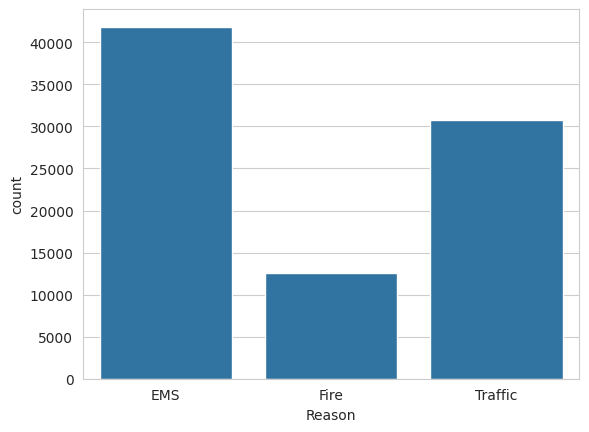

In [14]:
sns.countplot(x='Reason', data = df)

Data type of the objects in the timeStamp column

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85156 entries, 0 to 85155
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        85156 non-null  float64
 1   lng        85156 non-null  float64
 2   desc       85156 non-null  object 
 3   zip        74214 non-null  float64
 4   title      85156 non-null  object 
 5   timeStamp  85155 non-null  object 
 6   twp        85119 non-null  object 
 7   addr       84716 non-null  object 
 8   e          85155 non-null  float64
 9   Reason     85156 non-null  object 
dtypes: float64(4), object(6)
memory usage: 6.5+ MB


In [16]:
df['timeStamp'].iloc[0]

'2015-12-10 17:40:00'

In [17]:
type(df['timeStamp'].iloc[0])

str

Converting the type of the objects in the timeStamp column from strings to DateTime objects

In [18]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [19]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Creating new three columns called Hour, Month and Day of Week

In [20]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [21]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [22]:
df['Hour']

0        17.0
1        17.0
2        17.0
3        17.0
4        17.0
         ... 
85151    11.0
85152    11.0
85153    11.0
85154    11.0
85155     NaN
Name: Hour, Length: 85156, dtype: float64

In [23]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)

In [24]:
df['Month']

0        12.0
1        12.0
2        12.0
3        12.0
4        12.0
         ... 
85151     7.0
85152     7.0
85153     7.0
85154     7.0
85155     NaN
Name: Month, Length: 85156, dtype: float64

In [25]:
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [26]:
df['Day of Week']

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
85151    1.0
85152    1.0
85153    1.0
85154    1.0
85155    NaN
Name: Day of Week, Length: 85156, dtype: float64

In [27]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0,EMS,17.0,12.0,3.0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,EMS,17.0,12.0,3.0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0,Fire,17.0,12.0,3.0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0,EMS,17.0,12.0,3.0
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0,EMS,17.0,12.0,3.0


Mapping the actual string names to the day of the week

In [28]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [29]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [30]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0,EMS,17.0,12.0,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,EMS,17.0,12.0,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0,Fire,17.0,12.0,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0,EMS,17.0,12.0,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0,EMS,17.0,12.0,Thu


Countplot of the Day of Week column with the hue based off the Reason column

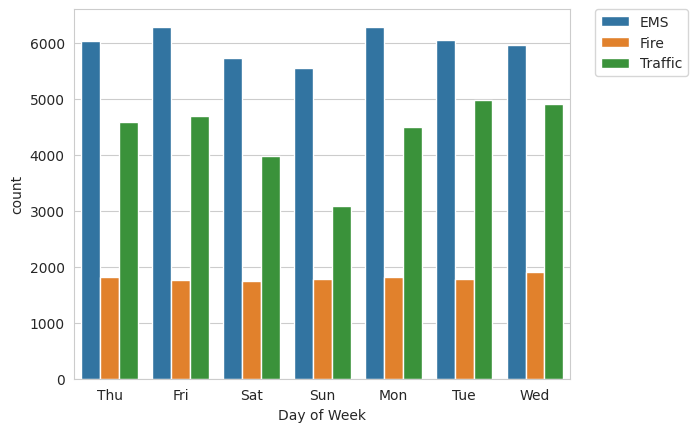

In [31]:
sns.countplot(x = 'Day of Week', data = df, hue = 'Reason')
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0)

Countplot of the Month column with the hue based off the Reason column

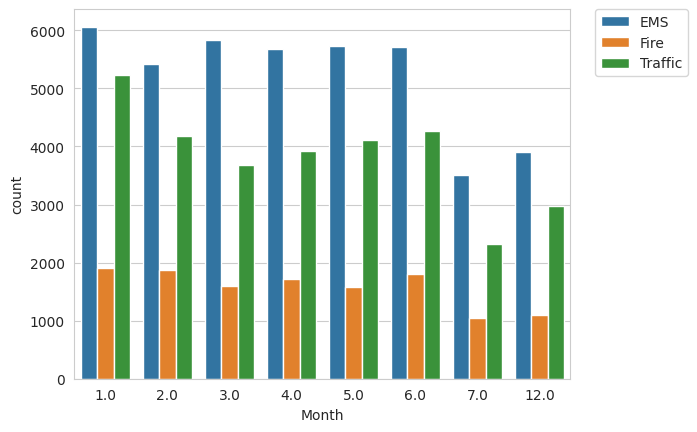

In [32]:
sns.countplot(x = 'Month', data = df, hue = 'Reason')
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0)

Plotting a simple line that fills the information in the missing months

In [33]:
byMonth = df.groupby('Month').count()

In [34]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1.0,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2.0,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3.0,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4.0,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5.0,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<Axes: xlabel='Month'>

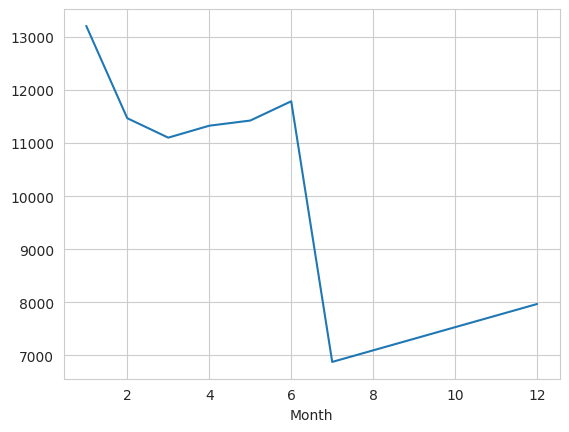

In [35]:
byMonth['lat'].plot()

In [36]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1.0,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2.0,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3.0,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4.0,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5.0,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6.0,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7.0,6878,6878,6878,6042,6878,6878,6876,6856,6878,6878,6878,6878
7,12.0,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


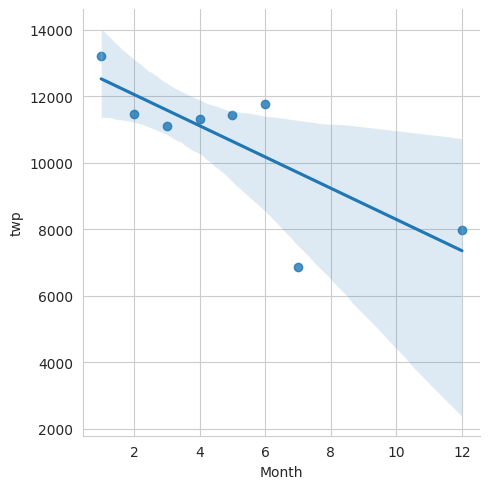

In [37]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

New Column called Date

In [38]:
t = df['timeStamp'].iloc[0]

In [39]:
t

Timestamp('2015-12-10 17:40:00')

In [40]:
t.date()

datetime.date(2015, 12, 10)

In [41]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

In [42]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0,EMS,17.0,12.0,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0,EMS,17.0,12.0,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0,Fire,17.0,12.0,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0,EMS,17.0,12.0,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0,EMS,17.0,12.0,Thu,2015-12-10


Groupby Date column

In [43]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


In [44]:
df.groupby('Date').count()['lat']

Date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
             ... 
2016-07-15    393
2016-07-16    343
2016-07-17    330
2016-07-18    405
2016-07-19    157
Name: lat, Length: 223, dtype: int64

Plot of counts of 911 calls according to date

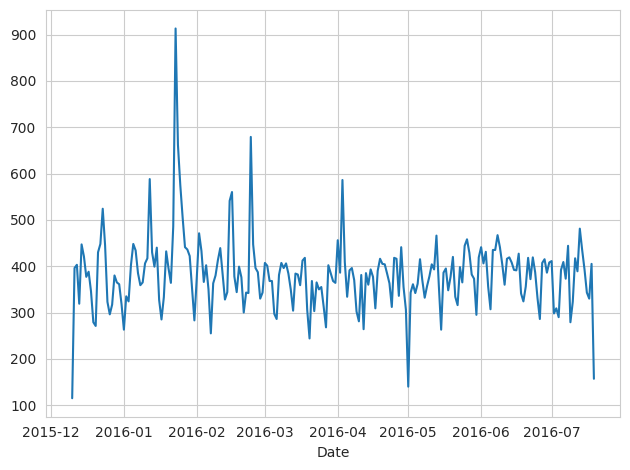

In [46]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

Three separete plots with each plot representing a reason for the 911 call

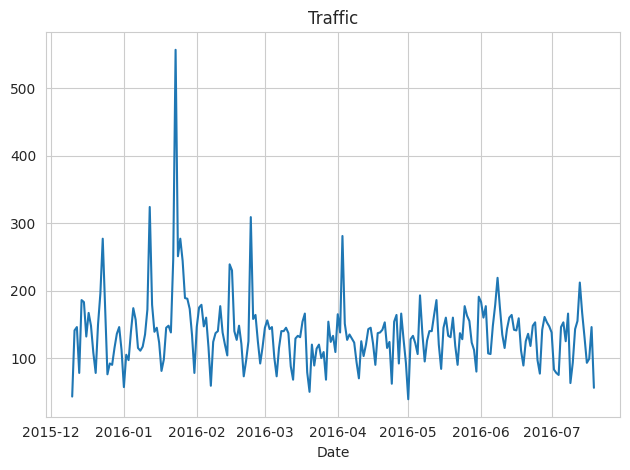

In [47]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

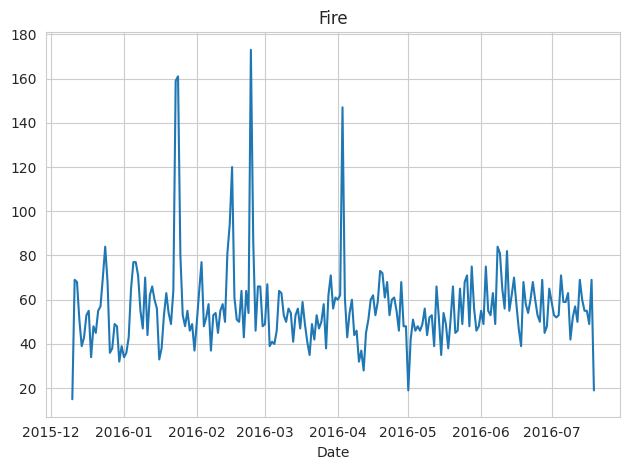

In [48]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

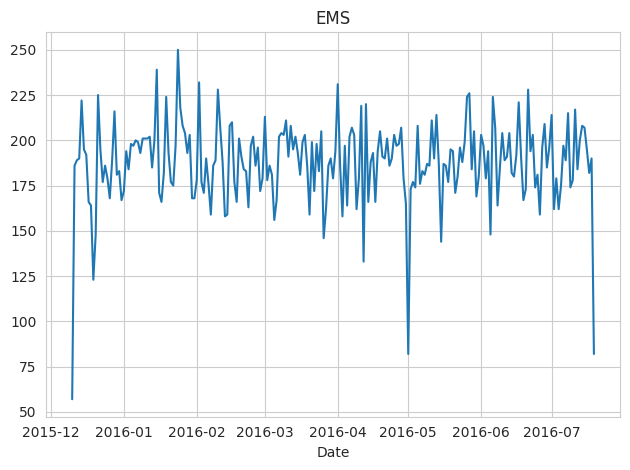

In [49]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

Restructuring the dataframe so that the columns become the Hours and the Index becomes the Day of Week

In [50]:
df.groupby(by=['Day of Week', 'Hour']).count()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of Week Hour                                                          
Fri         0.0   230  230   230  207    230        230  230   230  230   
            1.0   200  200   200  172    200        200  200   197  200   
            2.0   171  171   171  146    171        171  171   171  171   
            3.0   151  151   151  140    151        151  151   151  151   
            4.0   170  170   170  153    170        170  170   170  170   
...               ...  ...   ...  ...    ...        ...  ...   ...  ...   
Wed         19.0  601  601   601  516    601        601  601   597  601   
            20.0  584  584   584  524    584        584  584   582  584   
            21.0  502  502   502  443    502        502  502   499  502   
            22.0  438  438   438  393    438        438  438   433  438   
            23.0  277  277   277  248    277        277  276   277  277   

                  Reason  Month  Date  
Day of Week Hour                       
Fri         0.0      230    230   230  
            1.0      200    200   200  
            2.0      171    171   171  
            3.0      151    151   151  
            4.0      170    170   170  
...                  ...    ...   ...  
Wed         19.0     601    601   601  
            20.0     584    584   584  
            21.0     502    502   502  
            22.0     438    438   438  
            23.0     277    277   277  

[168 rows x 12 columns]

In [51]:
df.groupby(by=['Day of Week', 'Hour']).count()['Reason']

Day of Week  Hour
Fri          0.0     230
             1.0     200
             2.0     171
             3.0     151
             4.0     170
                    ... 
Wed          19.0    601
             20.0    584
             21.0    502
             22.0    438
             23.0    277
Name: Reason, Length: 168, dtype: int64

In [52]:
df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()

Hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,230,200,171,151,170,169,316,510,640,657,...,803,815,867,849,731,596,590,483,465,396
Mon,242,196,178,171,166,222,349,585,682,680,...,756,786,849,857,738,617,493,428,416,280
Sat,311,260,226,225,195,198,240,350,394,552,...,657,677,725,638,677,583,532,486,437,402
Sun,332,260,238,223,204,198,255,352,426,542,...,588,590,560,617,583,564,469,396,351,290
Thu,244,170,187,136,152,177,320,497,667,732,...,737,805,772,872,701,622,546,471,363,303
Tue,231,200,156,144,185,205,370,575,781,766,...,773,796,848,846,767,590,537,462,401,236
Wed,206,165,158,166,133,220,370,596,750,662,...,782,757,843,915,768,601,584,502,438,277


In [53]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()

Heatmap using this new DataFrame

<Figure size 1200x600 with 0 Axes>

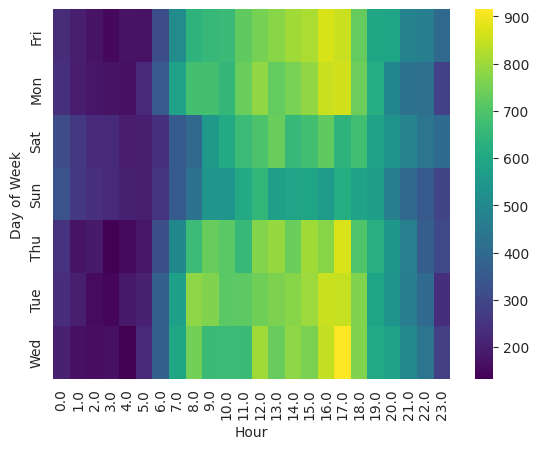

<Figure size 1200x600 with 0 Axes>

In [54]:
sns.heatmap(dayHour, cmap = 'viridis')
plt.figure(figsize=(12,6))

Clustermap using this new DataFrame

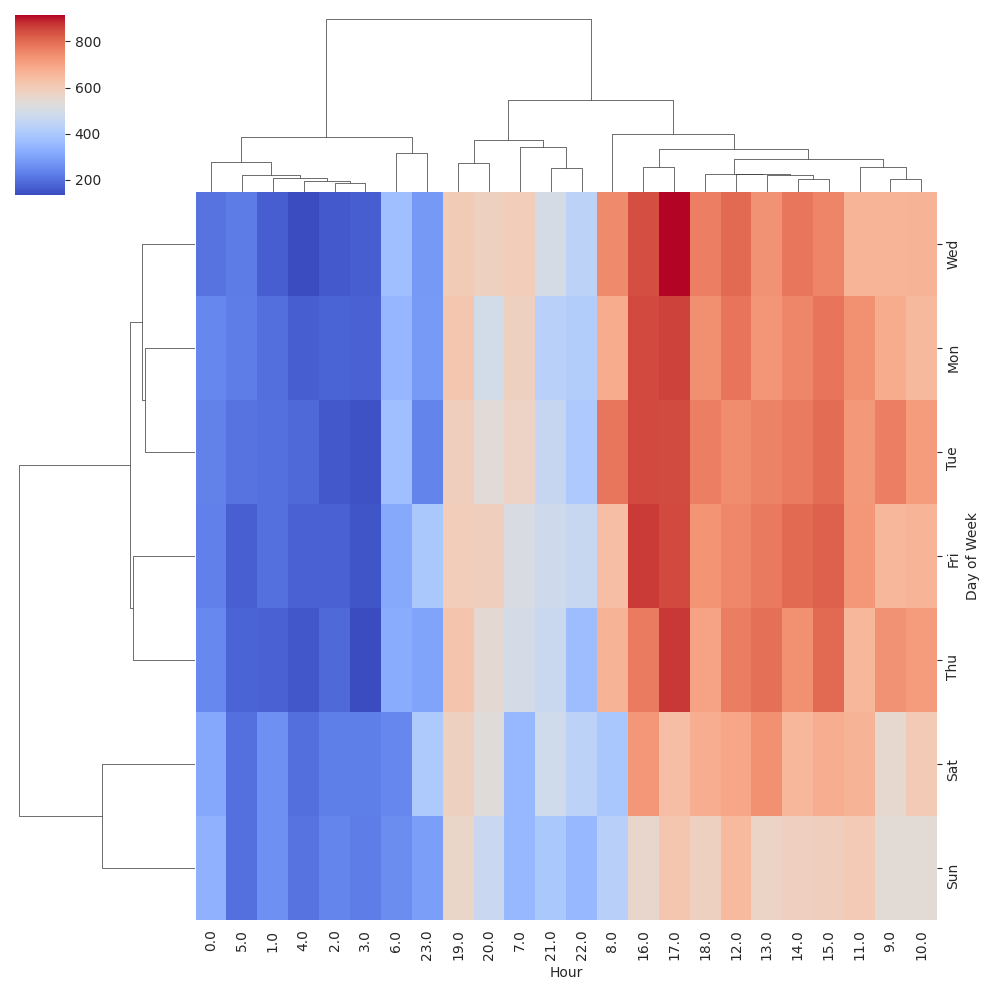

In [55]:
sns.clustermap(dayHour, cmap = 'coolwarm')

Repeating these sama plots and operations for a DataFrame that shows the Month as the column

In [57]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()

In [59]:
dayMonth.head()

Month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,12.0
Day of Week,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,1248,1065
Mon,1727,1964,1535,1598,1779,1617,1112,1257
Sat,2291,1441,1266,1734,1444,1388,920,978
Sun,1960,1229,1102,1488,1424,1333,962,907
Thu,1584,1596,1900,1601,1590,2065,808,1266


<Figure size 1200x600 with 0 Axes>

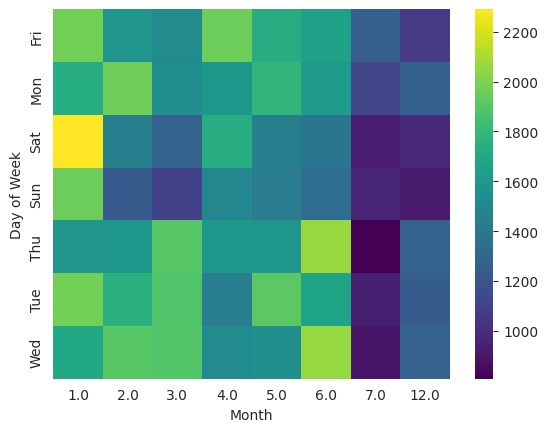

<Figure size 1200x600 with 0 Axes>

In [63]:
sns.heatmap(dayMonth, cmap='viridis')
plt.figure(figsize=(12,6))

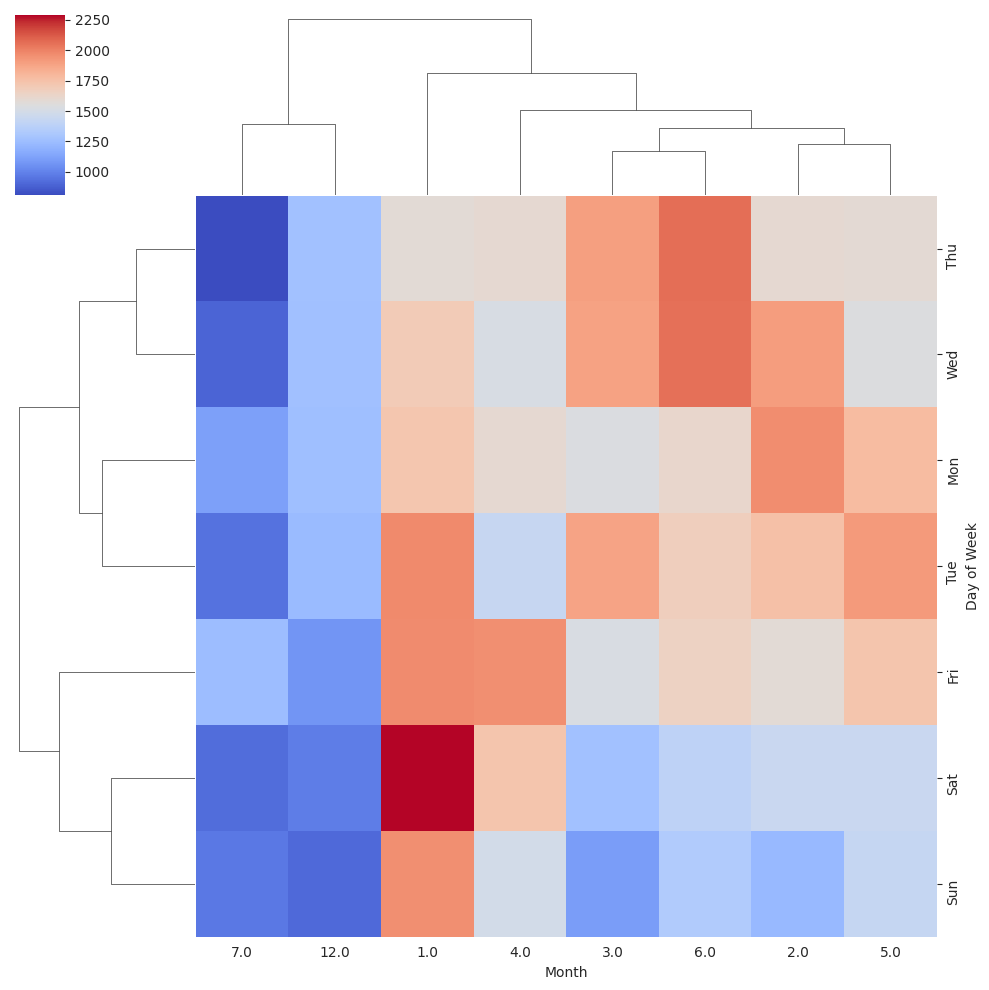

In [64]:
sns.clustermap(dayMonth, cmap='coolwarm')